# Set up and Preprocessing

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Read the dataset

In [131]:
data = pd.read_excel('fruit_data.xlsx')

### Understanding the size of the dataset

In [132]:
data.shape

(200, 5)

### Inspect the Dataset

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   fruit_type  200 non-null    object 
 2   color       200 non-null    object 
 3   size        200 non-null    object 
 4   weight      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


### Display the first few rows of the dataset

In [134]:
data.head()

,Unnamed: 0,fruit_type,color,size,weight
0,0,grape,Yellow,Tiny,8.303385
1,1,apple,Pink,Largee,80.976370
2,2,banana,Pale Yellow,Large,74.615192
3,3,grape,Red,Tiny,6.924070
4,4,banana,Creamy White,Largee,82.002542


### Understanding the uniqueness of the data

In [135]:
data.nunique()

Unnamed: 0    200
fruit_type      3
color           9
size            5
weight         81
dtype: int64

### Finding missing values

In [136]:
data.isnull().sum()

Unnamed: 0    0
fruit_type    0
color         0
size          0
weight        0
dtype: int64

### Description of dataset

In [137]:
data.describe()

,Unnamed: 0,weight
count,200.000000,200.000000
mean,99.500000,59.047220
std,57.879185,46.697739
min,0.000000,1.000000
25%,49.750000,8.142752
50%,99.500000,63.109415
75%,149.250000,94.367815
max,199.000000,250.000000


### Clean categorical data

In [146]:
size_replacements = {'Largee': 'Large'}
color_replacements = {'Yellow1': 'Yellow'}

data['size'].replace(size_replacements, inplace=True)
data['color'].replace(color_replacements, inplace=True)

C:\Users\azama\AppData\Local\Temp\ipykernel_44696\3334051108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['size'].replace(size_replacements, inplace=True)
C:\Users\azama\AppData\Local\Temp\ipykernel_44696\3334051108.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

### Encode categorical variables

In [147]:

le_fruit = LabelEncoder()
le_color = LabelEncoder()
le_size = LabelEncoder()

data['fruit_type_encoded'] = le_fruit.fit_transform(data['fruit_type'])
data['color_encoded'] = le_color.fit_transform(data['color'])
data['size_encoded'] = le_size.fit_transform(data['size'])

## Detect and Visualize Outliers

### Boxplot to visualize outliers in the 'weight' column

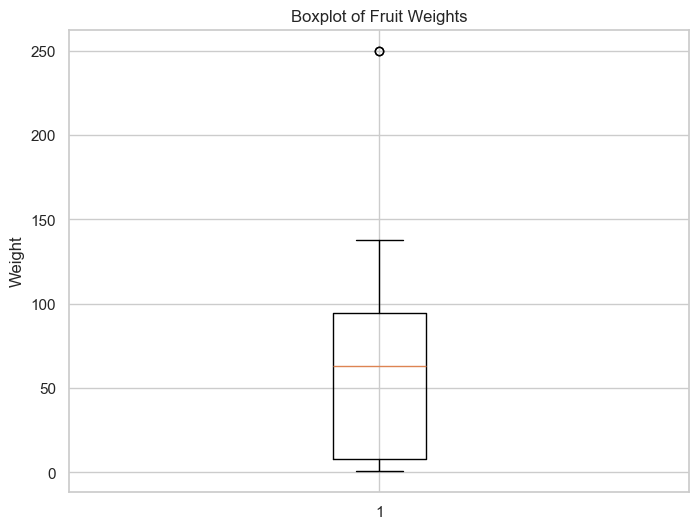

In [139]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['weight'])
plt.title('Boxplot of Fruit Weights')
plt.ylabel('Weight')
plt.show()

### Distribution of Fruit Weights

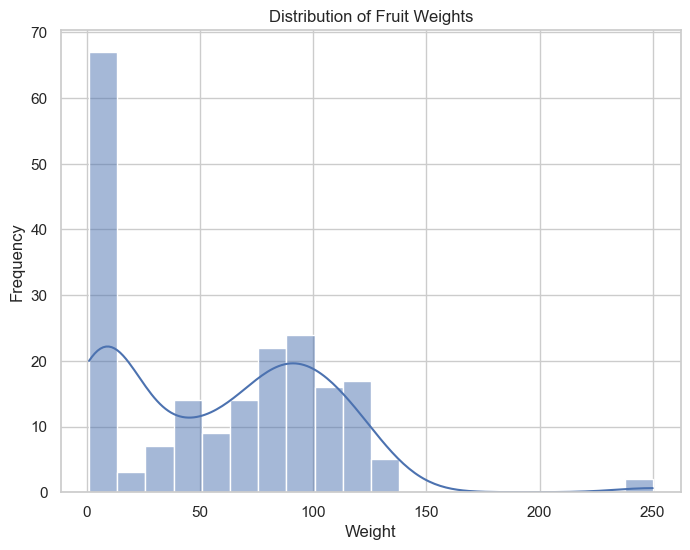

In [140]:
plt.figure(figsize=(8, 6))
sns.histplot(data['weight'], bins=20, kde=True)
plt.title('Distribution of Fruit Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Weights vs. Sizes

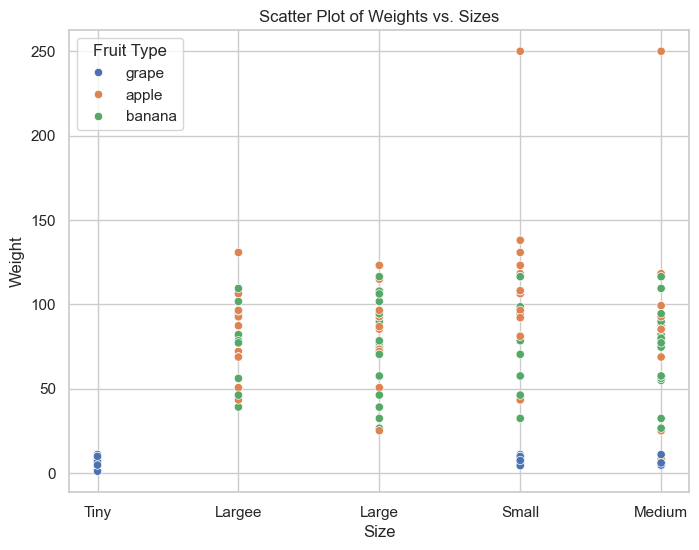

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='weight', hue='fruit_type', data=data)
plt.title('Scatter Plot of Weights vs. Sizes')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.legend(title='Fruit Type')
plt.show()

### Pair plot of attributes

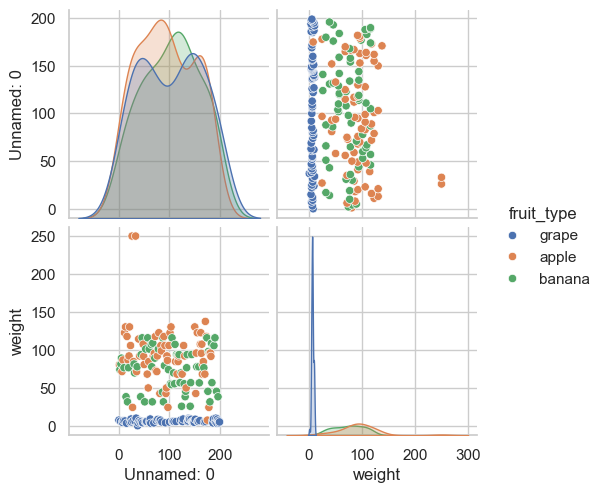

In [138]:
sns.pairplot(data, hue='fruit_type', height=2.5)
plt.show()

### Generate descriptive statistics to help to identify outliers

In [142]:
weight_stats = data['weight'].describe()
print("Weight Statistics:\n", weight_stats)

Weight Statistics:
 count    200.000000
mean      59.047220
std       46.697739
min        1.000000
25%        8.142752
50%       63.109415
75%       94.367815
max      250.000000
Name: weight, dtype: float64


### Outlier Treatment using IQR-based filtering

In [143]:
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
IQR = Q3 - Q1

### Filter out the outliers (Optional step, based on your needs)

In [144]:
data_filtered = data[(data['weight'] >= lower_bound) & (data['weight'] <= upper_bound)]

### Define lower and upper bounds for outliers

In [145]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hyperparameter tuning

### Prepare features X and target y

In [148]:
X = data[['color_encoded', 'size_encoded', 'weight']]
y = data['fruit_type_encoded']

### Split the data into training and testing sets

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

### Define the parameter grid

In [150]:
param_grid_expanded = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

### Initialize the GridSearchCV object

In [151]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

### Perform the grid search on the training data

In [152]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
223 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

### Get the best parameters and best estimator

In [153]:
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

### Print the best parameters

In [154]:
print("Best Parameters for Decision Tree:", best_params)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


### Evaluate the best model on the test data

In [155]:
y_pred_best_tree = best_tree.predict(X_test)
evaluate_model(y_test, y_pred_best_tree, "Optimized Decision Tree")

--- Optimized Decision Tree Performance ---
Accuracy: 0.8000
F1 Score: 0.8013
Classification Report:
              precision    recall  f1-score   support

       apple       0.81      0.72      0.76        18
      banana       0.67      0.77      0.71        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.81      0.80      0.80        40





## Logistic Regression

### Define the parameter grid

In [156]:
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300, 500],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

### Create a Logistic Regression model

In [157]:
logreg = LogisticRegression()

### Initialize the GridSearchCV object

In [158]:
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

### Perform the grid search on the training data

In [159]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 200, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=2)

### Get the best parameters and best estimator

In [160]:
best_params_logreg = grid_search_logreg.best_params_
best_logreg = grid_search_logreg.best_estimator_

### Print the best parameters

In [161]:
print("Best Parameters for Logistic Regression:", best_params_logreg)

Best Parameters for Logistic Regression: {'C': 1, 'class_weight': None, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### Evaluate the best model on the test data

In [162]:
y_pred_best_logreg = best_logreg.predict(X_test)
evaluate_model(y_test, y_pred_best_logreg, "Optimized Logistic Regression")

--- Optimized Logistic Regression Performance ---
Accuracy: 0.7000
F1 Score: 0.6877
Classification Report:
              precision    recall  f1-score   support

       apple       0.64      0.78      0.70        18
      banana       0.56      0.38      0.45        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.70        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.69      0.70      0.69        40



